In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
from io import StringIO

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
archive = arff.loadarff('eeg-eye-state.arff')

In [3]:
data = pd.DataFrame(archive[0])
data.head(5)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [4]:
values = data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12, 13]
c = 1

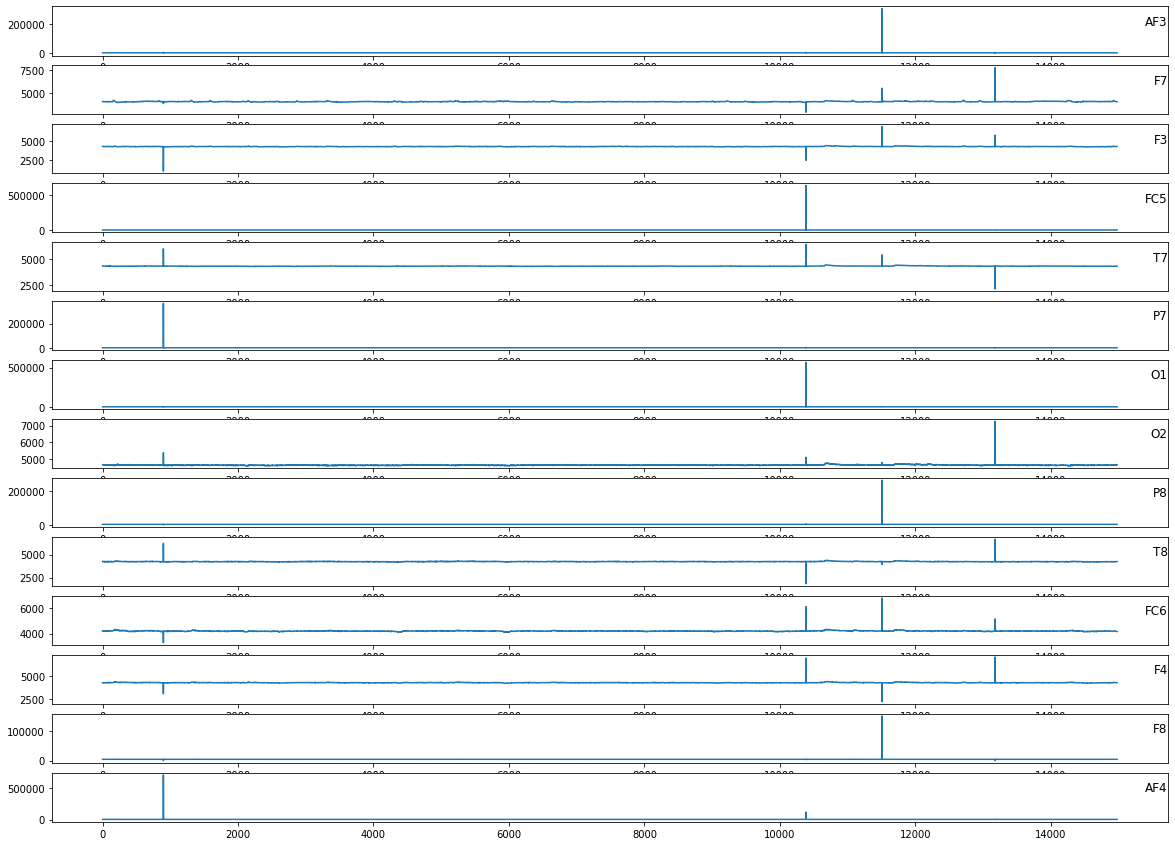

In [5]:
plt.figure(figsize=(20, 15))

for group in groups:
    plt.subplot(len(groups), 1, c)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y=0.5, loc='right')
    c += 1
plt.show()

In [6]:
data['eyeDetection'].unique()

array([b'0', b'1'], dtype=object)

In [7]:
label_encoder = LabelEncoder()

data.eyeDetection = label_encoder.fit_transform(data.eyeDetection)

In [8]:
x_train = data[['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8','AF4']]

In [9]:
names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8','AF4']

In [10]:
mms = MinMaxScaler(feature_range=(0,1))
scaled_values = mms.fit_transform(x_train)

In [11]:
eye_detection = list(data.eyeDetection)
new_data = pd.DataFrame(scaled_values, columns=names)
new_data.insert(14, 'eyeDetection', eye_detection)

In [12]:
new_data.head(5)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,0.010702,0.236931,0.556326,0.002648,0.515557,0.005053,0.003558,0.027383,0.010837,0.498575,0.264230,0.426286,0.029886,0.004237,0
1,0.010687,0.236004,0.557117,0.002649,0.513684,0.005054,0.003559,0.026619,0.010795,0.496148,0.263219,0.426071,0.029865,0.004224,0
2,0.010697,0.236416,0.557379,0.002661,0.512514,0.005046,0.003558,0.023390,0.010783,0.495197,0.262931,0.426610,0.029838,0.004231,0
3,0.010701,0.237446,0.557556,0.002660,0.514035,0.005043,0.003559,0.023579,0.010820,0.497940,0.264086,0.427799,0.029862,0.004241,0
4,0.010692,0.237446,0.556854,0.002653,0.514971,0.005054,0.003556,0.022437,0.010795,0.499735,0.264664,0.427909,0.029865,0.004244,0


In [13]:
values = new_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12, 13]
i = 1

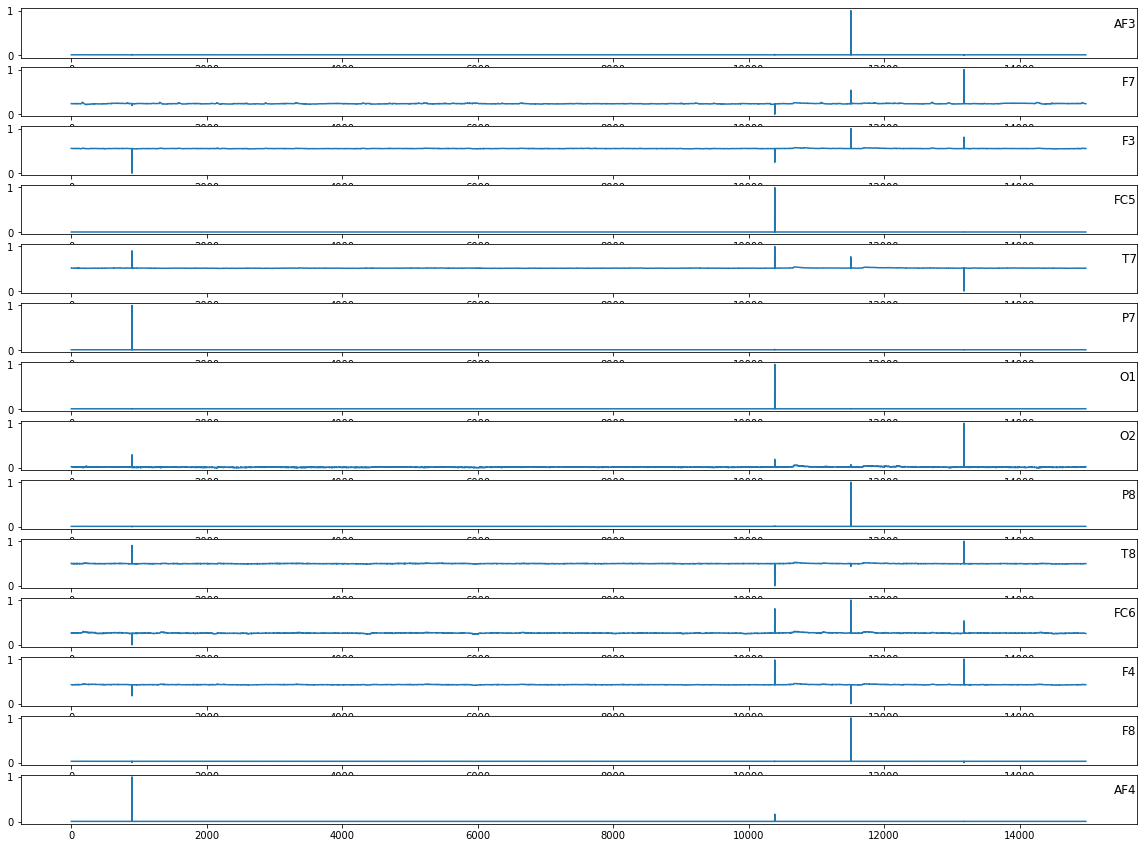

In [14]:
plt.figure(figsize=(20, 15))

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(new_data.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

Class 0: 8257
Class 1: 6723


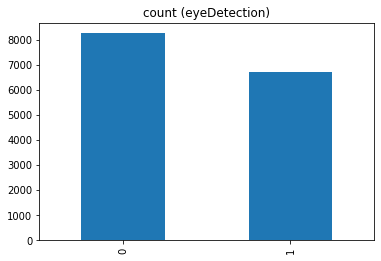

In [15]:
target = new_data.eyeDetection.value_counts()

print('Class 0:', target[0])
print('Class 1:', target[1])

target.plot(kind='bar', title='count (eyeDetection)')
plt.show()

# Oversampling

In [16]:
count_class_0, count_class_1 = new_data.eyeDetection.value_counts()

df_class_0 = new_data[new_data['eyeDetection'] == 0]
df_class_1 = new_data[new_data['eyeDetection'] == 1]

In [17]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random oversampling')
print(df_test_over.eyeDetection.value_counts())

Random oversampling
1    8257
0    8257
Name: eyeDetection, dtype: int64


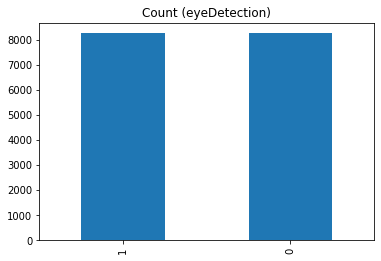

In [18]:
df_test_over.eyeDetection.value_counts().plot(kind='bar', title='Count (eyeDetection)');

# Undersampling

In [19]:
count_class_0, count_class_1 = new_data.eyeDetection.value_counts()

df_class_0 = new_data[new_data['eyeDetection'] == 0]
df_class_1 = new_data[new_data['eyeDetection'] == 1]

In [20]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Undersampling')
print(df_test_under.eyeDetection.value_counts())

Undersampling
1    6723
0    6723
Name: eyeDetection, dtype: int64


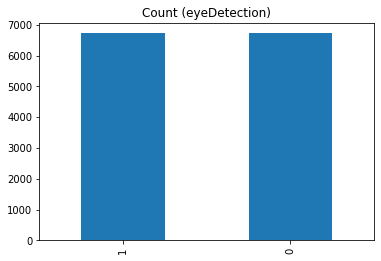

In [21]:
df_test_under.eyeDetection.value_counts().plot(kind='bar', title='Count (eyeDetection)');

In [40]:
X = df_test_over.loc[:,['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8','AF4']]

In [41]:
Y = df_test_over.loc[:,'eyeDetection']

In [24]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(y)*train_size)]
    y_test = y[int(len(y)*train_size):]
    return x_train, x_test, y_train, y_test

In [25]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, train_size=0.7)

In [26]:
def network_model():
    model = Sequential()
    
    model.add(Dense(30, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return model

In [27]:
mlp_regressor = KerasRegressor(build_fn=network_model, epochs=100, batch_size=20)

In [28]:
model = mlp_regressor.fit(X_train, Y_train, validation_data=(X_test, Y_test), shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 11559 samples, validate on 4955 samples
Epoch 1/100
11559/11559 [==============================] - 2s 140us/step - loss: 0.0193 - acc: 0.9721 - val_loss: 5.5874e-04 - val_acc: 0.9996
Epoch 2/100
11559/11559 [==============================] - 1s 59us/step - loss: 0.0480 - acc: 0.9328 - val_loss: 5.5192e-04 - val_acc: 0.9996
Epoch 3/100
11559/11559 [==============================] - 1s 60us/step - loss: 0.0810 - acc: 0.8893 - val_loss: 4.9339e-04 - val_acc: 0.9996
Epoch 4/100
11559/11559 [==============================] - 1s 59us/step - loss: 0.1323 - acc: 0.8196 - val_loss: 0.0033 - val_acc: 0.9996
Epoch 5/100
11559/11559 [==============================] - 1s 60us/step - loss: 0.1686 - acc: 0.7681 - val_loss: 0.0228 - val_acc: 0.9996
Epoch 6/100
11559/11559 [==============================] - 1s 61us/step - loss: 0.1779 - acc: 0.7468 - val_loss: 0.0407 - val_ac

Epoch 55/100
11559/11559 [==============================] - 1s 58us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3465 - val_acc: 0.0000e+00
Epoch 56/100
11559/11559 [==============================] - 1s 58us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3465 - val_acc: 0.0000e+00
Epoch 57/100
11559/11559 [==============================] - 1s 57us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3465 - val_acc: 0.0000e+00
Epoch 58/100
11559/11559 [==============================] - 1s 57us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3465 - val_acc: 0.0000e+00
Epoch 59/100
11559/11559 [==============================] - 1s 57us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3465 - val_acc: 0.0000e+00
Epoch 60/100
11559/11559 [==============================] - 1s 58us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3465 - val_acc: 0.0000e+00
Epoch 61/100
11559/11559 [==============================] - 1s 58us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3465 - val_acc: 0.0000e+00

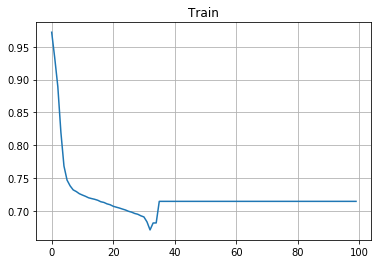

In [29]:
plt.title('Train')
plt.grid(True)
plt.plot(model.history['acc'])
plt.show()

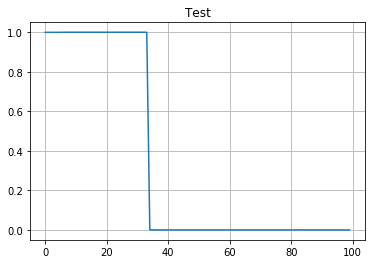

In [30]:
plt.title('Test')
plt.grid(True)
plt.plot(model.history['val_acc'])
plt.show()

In [31]:
pred = mlp_regressor.predict(X_test)

In [32]:
mlp_classifier = KerasClassifier(build_fn=network_model, epochs=100, batch_size=20)

In [33]:
model_2 = mlp_classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), shuffle=False)

Train on 11559 samples, validate on 4955 samples
Epoch 1/100
11559/11559 [==============================] - 1s 73us/step - loss: 0.0170 - acc: 0.9755 - val_loss: 4.9989e-04 - val_acc: 0.9996
Epoch 2/100
11559/11559 [==============================] - 1s 61us/step - loss: 0.0434 - acc: 0.9408 - val_loss: 4.8367e-04 - val_acc: 0.9996
Epoch 3/100
11559/11559 [==============================] - 1s 59us/step - loss: 0.0512 - acc: 0.9289 - val_loss: 4.9036e-04 - val_acc: 0.9996
Epoch 4/100
11559/11559 [==============================] - 1s 62us/step - loss: 0.0807 - acc: 0.8906 - val_loss: 4.0541e-04 - val_acc: 0.9996
Epoch 5/100
11559/11559 [==============================] - 1s 61us/step - loss: 0.1103 - acc: 0.8529 - val_loss: 3.9143e-04 - val_acc: 0.9996
Epoch 6/100
11559/11559 [==============================] - 1s 63us/step - loss: 0.1429 - acc: 0.8072 - val_loss: 0.0029 - val_acc: 0.9996
Epoch 7/100
11559/11559 [==============================] - 1s 61us/step - loss: 0.1751 - acc: 0.7579 - 

Epoch 59/100
11559/11559 [==============================] - 1s 59us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3464 - val_acc: 0.0000e+00
Epoch 60/100
11559/11559 [==============================] - 1s 57us/step - loss: 0.2065 - acc: 0.7143 - val_loss: 0.3464 - val_acc: 0.0000e+00
Epoch 61/100
11559/11559 [==============================] - 1s 60us/step - loss: 0.2016 - acc: 0.7143 - val_loss: 0.3222 - val_acc: 0.0000e+00
Epoch 62/100
11559/11559 [==============================] - 1s 59us/step - loss: 0.2098 - acc: 0.7143 - val_loss: 0.3397 - val_acc: 0.0000e+00
Epoch 63/100
11559/11559 [==============================] - 1s 58us/step - loss: 0.2074 - acc: 0.7143 - val_loss: 0.3446 - val_acc: 0.0000e+00
Epoch 64/100
11559/11559 [==============================] - 1s 60us/step - loss: 0.2067 - acc: 0.7143 - val_loss: 0.3459 - val_acc: 0.0000e+00
Epoch 65/100
11559/11559 [==============================] - 1s 58us/step - loss: 0.2013 - acc: 0.7143 - val_loss: 0.3265 - val_acc: 0.0000e+00

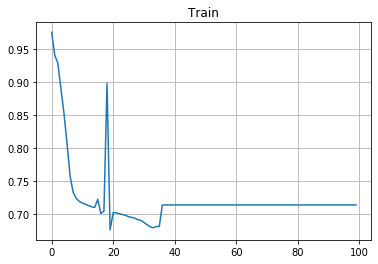

In [34]:
plt.title('Train')
plt.grid(True)
plt.plot(model_2.history['acc'])
plt.show()

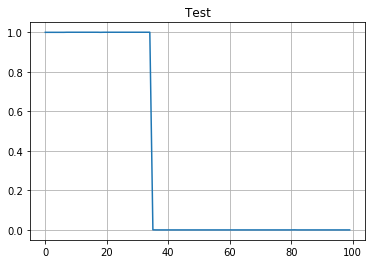

In [35]:
plt.title('Test')
plt.grid(True)
plt.plot(model_2.history['val_acc'])
plt.show()

In [37]:
x = df_test_under.loc[:,['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8','AF4']]

In [39]:
y = df_test_under.loc[:,'eyeDetection']

In [42]:
x_train, x_test, y_train, y_test = split_data(x, y, train_size=0.7)

In [43]:
mlp_regressor_2 = KerasRegressor(build_fn=network_model, epochs=100, batch_size=20)

In [44]:
model_3 = mlp_regressor_2.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle=False)

Train on 9412 samples, validate on 4034 samples
Epoch 1/100
9412/9412 [==============================] - 1s 86us/step - loss: 0.0204 - acc: 0.9706 - val_loss: 3.4369e-04 - val_acc: 0.9998
Epoch 2/100
9412/9412 [==============================] - 1s 64us/step - loss: 0.0786 - acc: 0.8918 - val_loss: 3.4585e-04 - val_acc: 0.9998
Epoch 3/100
9412/9412 [==============================] - 1s 64us/step - loss: 0.1093 - acc: 0.8524 - val_loss: 3.4172e-04 - val_acc: 0.9998
Epoch 4/100
9412/9412 [==============================] - 1s 66us/step - loss: 0.1275 - acc: 0.8279 - val_loss: 4.1010e-04 - val_acc: 0.9998
Epoch 5/100
9412/9412 [==============================] - 1s 65us/step - loss: 0.1449 - acc: 0.8048 - val_loss: 0.0017 - val_acc: 0.9998
Epoch 6/100
9412/9412 [==============================] - 1s 63us/step - loss: 0.1555 - acc: 0.7882 - val_loss: 0.0044 - val_acc: 0.9998
Epoch 7/100
9412/9412 [==============================] - 1s 63us/step - loss: 0.1636 - acc: 0.7756 - val_loss: 0.0085 - 

9412/9412 [==============================] - 1s 64us/step - loss: 0.2083 - acc: 0.7143 - val_loss: 0.3785 - val_acc: 0.0000e+00
Epoch 60/100
9412/9412 [==============================] - 1s 62us/step - loss: 0.2083 - acc: 0.7143 - val_loss: 0.3785 - val_acc: 0.0000e+00
Epoch 61/100
9412/9412 [==============================] - 1s 64us/step - loss: 0.2083 - acc: 0.7143 - val_loss: 0.3785 - val_acc: 0.0000e+00
Epoch 62/100
9412/9412 [==============================] - 1s 65us/step - loss: 0.2083 - acc: 0.7143 - val_loss: 0.3785 - val_acc: 0.0000e+00
Epoch 63/100
9412/9412 [==============================] - 1s 62us/step - loss: 0.2083 - acc: 0.7143 - val_loss: 0.3785 - val_acc: 0.0000e+00
Epoch 64/100
9412/9412 [==============================] - 1s 67us/step - loss: 0.2083 - acc: 0.7143 - val_loss: 0.3785 - val_acc: 0.0000e+00
Epoch 65/100
9412/9412 [==============================] - 1s 61us/step - loss: 0.2083 - acc: 0.7143 - val_loss: 0.3785 - val_acc: 0.0000e+00
Epoch 66/100
9412/9412 [==

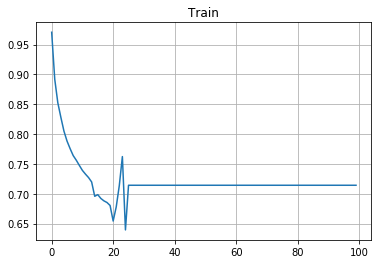

In [45]:
plt.title('Train')
plt.grid(True)
plt.plot(model_3.history['acc'])
plt.show()

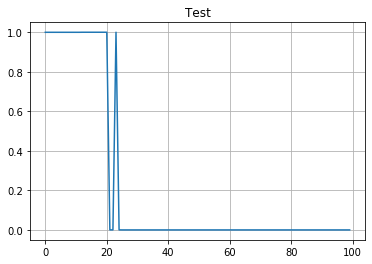

In [46]:
plt.title('Test')
plt.grid(True)
plt.plot(model_3.history['val_acc'])
plt.show()